In [1]:
# pip install --upgrade scikit-learn xgboost

## **Import Library**

In [1]:
import joblib

In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
sns.set()
sns.set_style("whitegrid",{"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette("blend:#7AB,#EDA")
warnings.filterwarnings('ignore')

## **Load Dataset**

In [3]:
df = pd.read_csv('/content/datascience_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


## **Exploratory Data Analysis (EDA)**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.duplicated().sum()

5711

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [9]:
df.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [10]:
print('--------No of Unique Values---------')
print('Column   :   Number of Unique Values')
print('------------------------------------')
for col in df.columns:
    unique_num = len(df[col].value_counts())
    print(f'{col} : {unique_num}')
print('------------------------------------')

--------No of Unique Values---------
Column   :   Number of Unique Values
------------------------------------
work_year : 5
experience_level : 4
employment_type : 4
job_title : 153
salary : 2363
salary_currency : 23
salary_in_usd : 2730
employee_residence : 88
remote_ratio : 3
company_location : 77
company_size : 3
------------------------------------


In [11]:
df.remote_ratio.value_counts()

,count
remote_ratio,
0,5690
100,3191
50,246


In [12]:
df.company_location.value_counts()

,count
company_location,
US,7520
GB,515
CA,351
DE,97
ES,70
...,...
IR,1
MU,1
QA,1


## **Data Vizualitation**

In [13]:
df['experience_level'].replace({'EN':'Entry-Level','MI':'Mid-Level','EX':'Executive Level','SE':'Senior'},inplace=True)
df['employment_type'].replace({'PT':'Part-Time','FT':'Full-Time','CT':'Contract','FL':'Freelance'},inplace=True)

[]

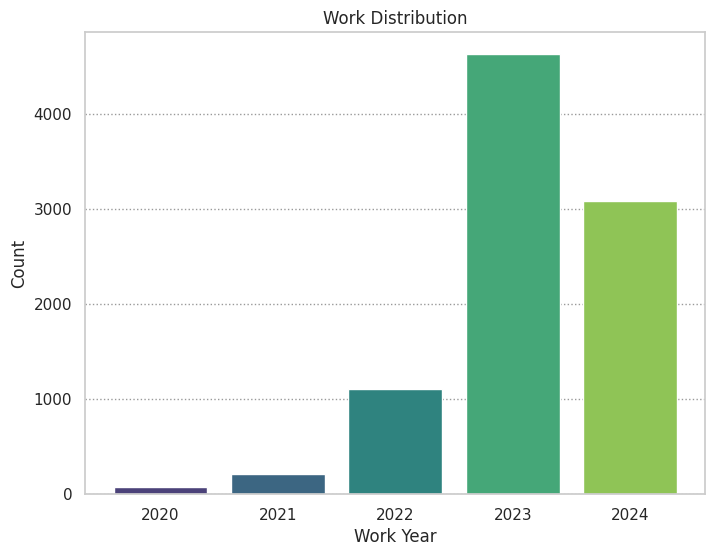

In [14]:
plt.figure(figsize = (8,6))
sns.countplot(data = df,x = 'work_year', palette='viridis')
plt.xlabel("Work Year")
plt.ylabel("Count")
plt.title("Work Distribution")
plt.plot()

[]

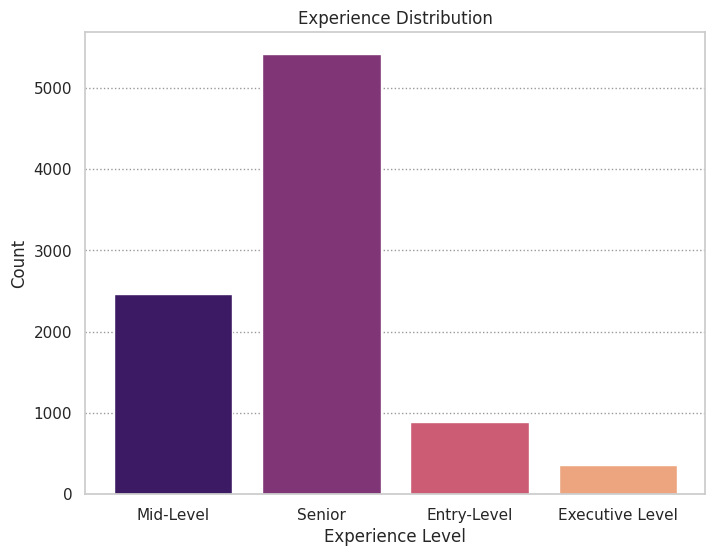

In [15]:
plt.figure(figsize = (8,6))
sns.countplot(data = df,x = 'experience_level', palette='magma')
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.title("Experience Distribution")
plt.plot()

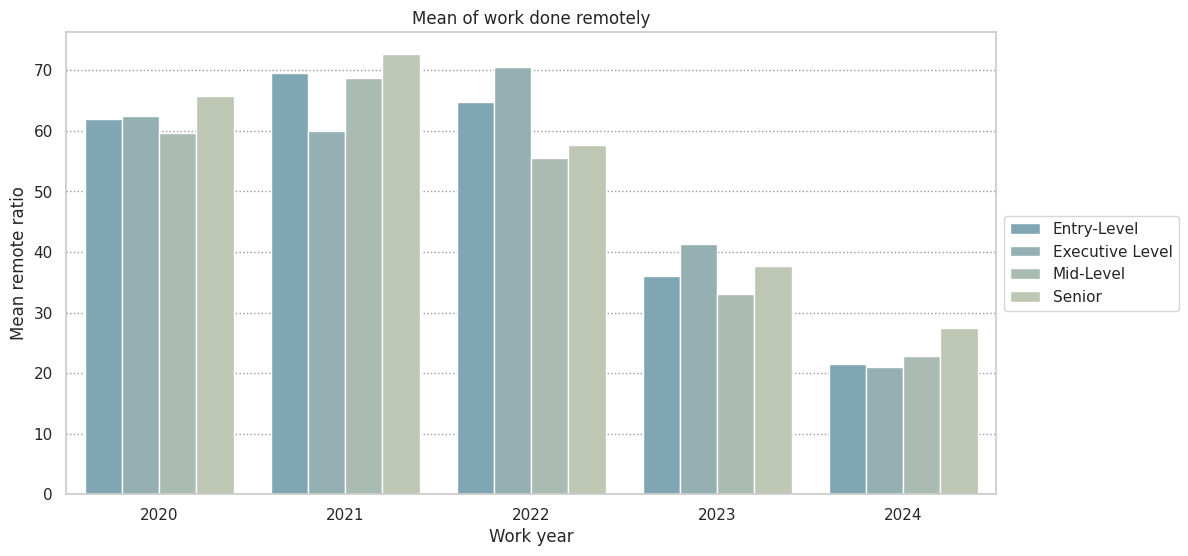

In [16]:
remote_ratio_mean = df.groupby(['work_year', 'experience_level']).agg(mean_remote_ratio=('remote_ratio', 'mean'))
remote_ratio_mean.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=remote_ratio_mean,
            x='work_year',
            y='mean_remote_ratio',
            hue='experience_level')
plt.title('Mean of work done remotely')
plt.xlabel('Work year')
plt.ylabel('Mean remote ratio')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

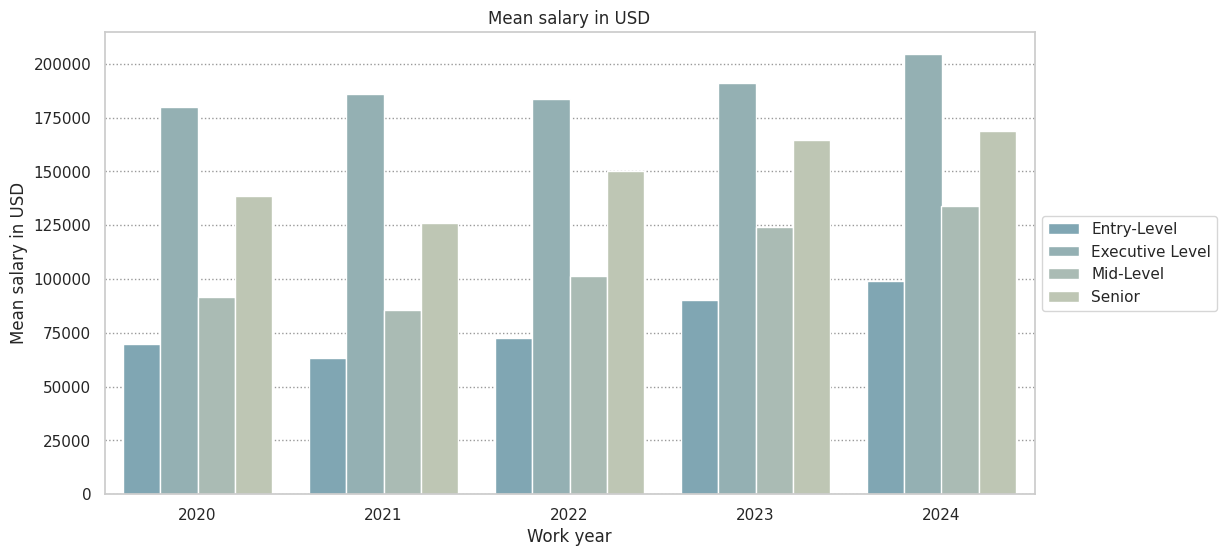

In [17]:
salary_in_usd_mean = df.groupby(['work_year', 'experience_level']).agg(mean_salary_in_usd=('salary_in_usd', 'mean'))
salary_in_usd_mean.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=salary_in_usd_mean,
            x='work_year',
            y='mean_salary_in_usd',
            hue='experience_level')
plt.title('Mean salary in USD')
plt.xlabel('Work year')
plt.ylabel('Mean salary in USD')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

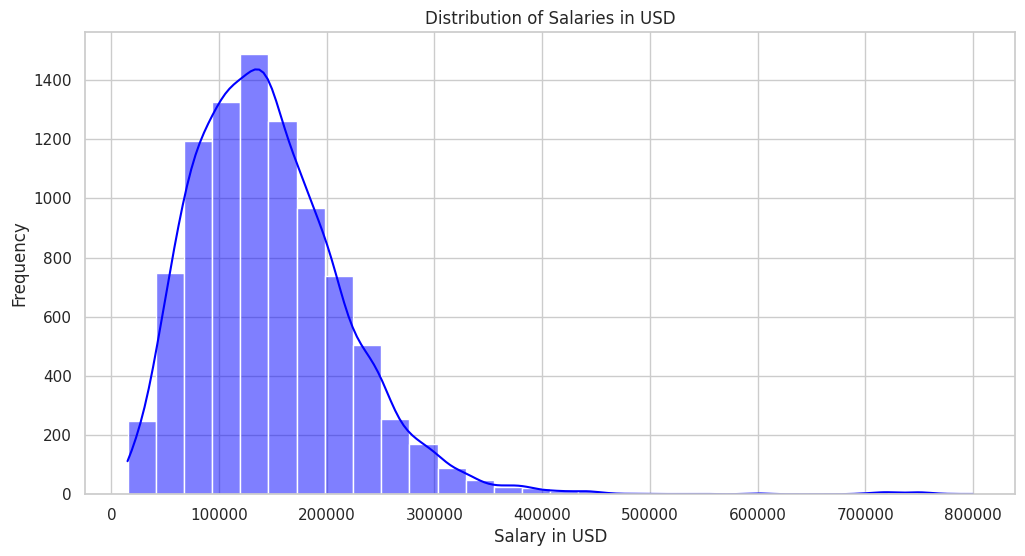

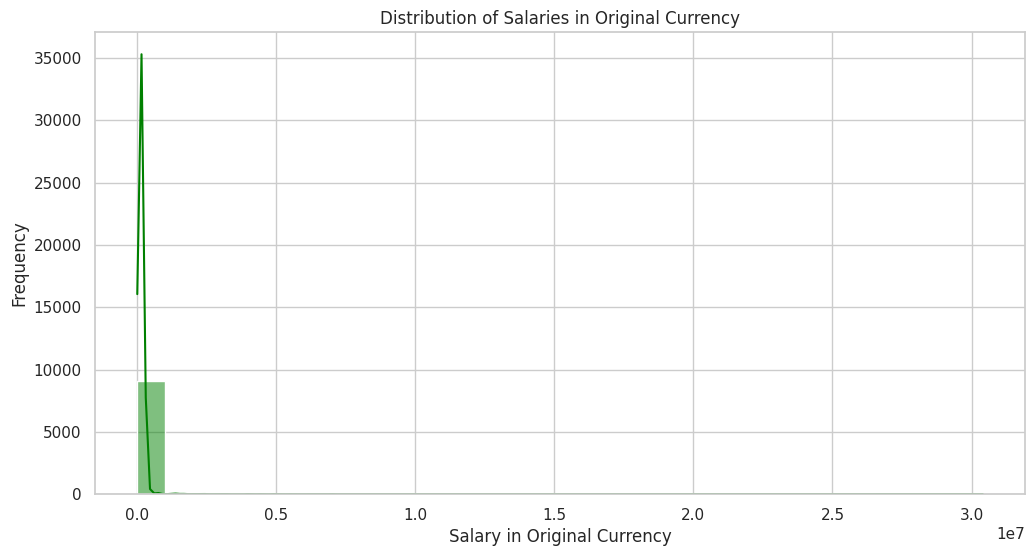

In [18]:
# Set style for plots
sns.set(style="whitegrid")

# Plotting the salary distribution in USD
plt.figure(figsize=(12, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True, color='blue')
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()
print()

# Plotting the salary distribution in original currency
plt.figure(figsize=(12, 6))
sns.histplot(df['salary'], bins=30, kde=True, color='green')
plt.title('Distribution of Salaries in Original Currency')
plt.xlabel('Salary in Original Currency')
plt.ylabel('Frequency')
plt.show()

In [19]:
z=df['job_title'].value_counts().head(10)
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'job title','y':'count','text':'count'},template='seaborn',title='<b> Top 10 Popular Roles in Data Sceince')
fig.show()

In [20]:
fig=px.bar(df.groupby('job_title',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False).head(10),x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'job title','salary_in_usd':'salary in usd'},template='ggplot2',text='salary_in_usd',title='<b> Top 10 Highest Paid Roles in Data Science')
fig.show()

In [21]:
px.violin(
    df,x='work_year',y='salary_in_usd',color='work_year',labels={'work_year':'year','salary_in_usd':'salary in usd'},
    template='seaborn',title='<b>Data Science Salaries by year'
)

In [22]:
px.box(
    df,x='experience_level',y='salary_in_usd',color='experience_level',
    template='ggplot2',labels={'experience_level':'Experience Level','salary_in_usd':'salary in usd'},
    title='<b>Data Sceince Salaries by Experience'
)

In [23]:
px.box(
    df,x='employment_type',y='salary_in_usd',color='employment_type',
    template='seaborn',labels={'employment_type':'Employment Type','salary_in_usd':'salary in usd'},
    title='<b>Data Sceince Salaries by type of employee'
)

In [24]:
px.box(
    df,x='company_size',y='salary_in_usd',color='company_size',
    template='ggplot2',labels={'company_size':'Company Size','salary_in_usd':'salary in usd'},
    title='<b>Data Sceince Salaries by Company Size'
)

In [25]:
# Calculate the average salary by employee residence, filter for top 10 most common countries
top_employee_residence_salaries = df.groupby('employee_residence')['salary_in_usd'].mean().nlargest(10)

# Calculate the average salary by company location, filter for top 10 most common locations
top_company_location_salaries = df.groupby('company_location')['salary_in_usd'].mean().nlargest(10)

# Display the results
top_employee_residence_salaries, top_company_location_salaries

(employee_residence
 IL    417937.000000
 QA    300000.000000
 MY    200000.000000
 PR    166000.000000
 US    157627.119395
 NZ    147681.666667
 CA    143388.977077
 SA    139999.333333
 CH    137187.500000
 MX    134186.357143
 Name: salary_in_usd, dtype: float64,
 company_location
 QA    300000.000000
 IL    217332.000000
 PR    167500.000000
 US    157124.161968
 NZ    147681.666667
 CA    142866.025641
 SA    139999.333333
 EG    138727.272727
 MX    129240.600000
 AU    126932.714286
 Name: salary_in_usd, dtype: float64)

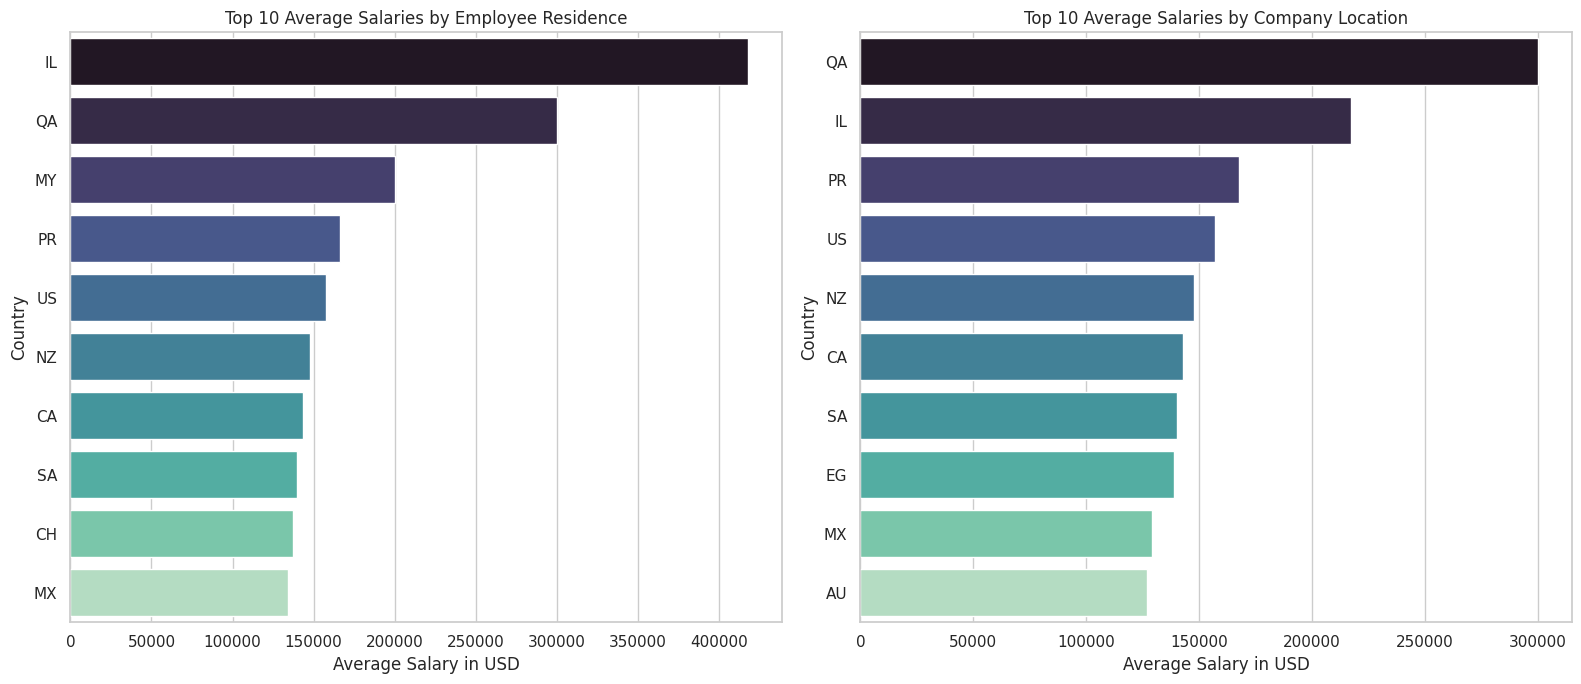

In [26]:
# Plotting
plt.figure(figsize=(16, 7))

# Average Salary by Employee Residence
plt.subplot(1, 2, 1)
sns.barplot(x=top_employee_residence_salaries.values, y=top_employee_residence_salaries.index, palette='mako')
plt.title('Top 10 Average Salaries by Employee Residence')
plt.xlabel('Average Salary in USD')
plt.ylabel('Country')

# Average Salary by Company Location
plt.subplot(1, 2, 2)
sns.barplot(x=top_company_location_salaries.values, y=top_company_location_salaries.index, palette='mako')
plt.title('Top 10 Average Salaries by Company Location')
plt.xlabel('Average Salary in USD')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

## **Preprocessing Data**

In [27]:
X = df[['experience_level','remote_ratio','company_size']]
y = df['salary_in_usd']

# one-hot
X = pd.get_dummies(X, columns=['experience_level','company_size'])
X.head()

,remote_ratio,experience_level_Entry-Level,experience_level_Executive Level,experience_level_Mid-Level,experience_level_Senior,company_size_L,company_size_M,company_size_S
0,100,False,False,True,False,True,False,False
1,50,False,False,True,False,True,False,False
2,50,False,False,True,False,True,False,False
3,50,False,False,True,False,False,False,True
4,50,False,False,False,True,True,False,False


## **Train and Test Split Data**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7301, 8), (1826, 8), (7301,), (1826,))

## **Training Model**

### XGB Regressor

In [29]:
# Import Library yang Diperlukan
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Persiapan Data
X = df[['experience_level', 'remote_ratio', 'company_size']]
y = df['salary_in_usd']
X = pd.get_dummies(X, columns=['experience_level', 'company_size'])

# Membagi Data Menjadi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Bentuk data latih: {X_train.shape}, {y_train.shape}')
print(f'Bentuk data uji: {X_test.shape}, {y_test.shape}')

# Melatih Model Menggunakan XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

# Melakukan Prediksi Menggunakan Data Uji
y_pred = model.predict(X_test)

Bentuk data latih: (7301, 8), (7301,)
Bentuk data uji: (1826, 8), (1826,)


In [30]:
# Melakukan Prediksi Menggunakan Data Uji
y_pred = model.predict(X_test)

# Evaluasi Model Menggunakan Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 5246971904.0


In [31]:
joblib.dump(y_pred, 'xgboost_model.joblib')

['xgboost_model.joblib']

In [32]:
y_pred = joblib.load('/content/xgboost_model.joblib')

In [34]:
predictions = model.predict(X_test)
predictions

array([200965.6 , 167705.7 , 167705.7 , ..., 167705.7 , 130915.11,
        77061.67], dtype=float32)

In [ ]:
# param_grid = {
#     'n_estimators': [100, 150, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.02, 0.05],
#     'max_depth': [3, 4, 6, 8 , 10, 15]
# }

# grid_search = GridSearchCV(estimator=XGBRegressor(use_label_encoder=False, eval_metric='rmse'),
#                            param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parametrs:", best_params)
# print("Best Score:", best_score)

In [ ]:
# xgb_regressor = XGBRegressor(learning_rate=0.02, max_depth=3, n_estimators=100)
# xgb_regressor.fit(X_train, y_train)

# y_train_pred = xgb_regressor.predict(X_train)
# y_test_pred = xgb_regressor.predict(X_test)

# print("Train RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))
# print("Test RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))

In [ ]:
# from sklearn.metrics import mean_squared_error

# # XGBoost Regressor
# xgb_regressor = XGBRegressor(learning_rate=0.02, max_depth=3, n_estimators=100)
# xgb_regressor.fit(X_train, y_train)

# y_train_pred_xgb = xgb_regressor.predict(X_train)
# y_test_pred_xgb = xgb_regressor.predict(X_test)

# train_rmse_xgb = mean_squared_error(y_train, y_train_pred_xgb, squared=False)
# test_rmse_xgb = mean_squared_error(y_test, y_test_pred_xgb, squared=False)

# print("XGBoost Regressor")
# print("Train RMSE:", train_rmse_xgb)
# print("Test RMSE:", test_rmse_xgb)
# print()